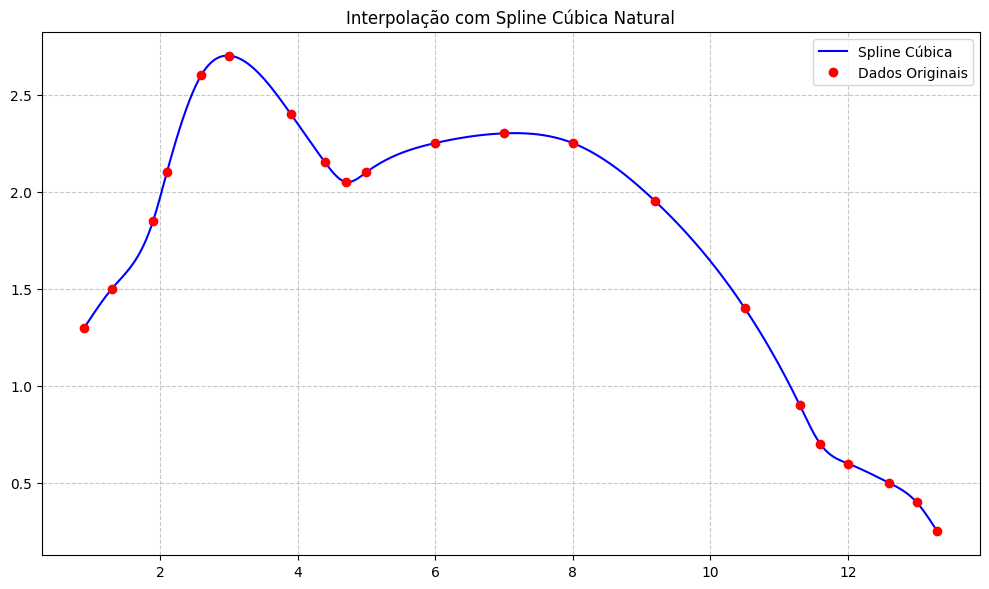

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def natural_cubic_spline(x, y):
    """ Calcula os coeficientes da Spline Cúbica Natural. Retorna arrays b, c, d para a equação: S_j(x) = a_j + b_j(dx) + c_j(dx)^2 + d_j(dx)^3 """
    n = len(x) - 1
    h = np.diff(x)

    # Sistema linear tridiagonal (lado direito da equação)
    alpha = np.zeros(n)
    for i in range(1, n):
        term1 = (3/h[i]) * (y[i+1] - y[i])
        term2 = (3/h[i-1]) * (y[i] - y[i-1])
        alpha[i] = term1 - term2

    # Resolução do sistema (forward elimination)
    l = np.ones(n + 1)
    mu = np.zeros(n + 1)
    z = np.zeros(n + 1)

    for i in range(1, n):
        l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * mu[i-1]
        mu[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]

    # (back substitution)
    b = np.zeros(n)
    c = np.zeros(n + 1)
    d = np.zeros(n)

    for j in range(n - 1, -1, -1):
        c[j] = z[j] - mu[j] * c[j+1]
        b[j] = (y[j+1] - y[j])/h[j] - h[j] * (c[j+1] + 2*c[j])/3
        d[j] = (c[j+1] - c[j])/(3 * h[j])

    return y[:-1], b, c[:-1], d

#dados
x_pts = np.array([0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3])
y_pts = np.array([1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25])

#processamento
# Pegamos os coeficientes
a, b, c, d = natural_cubic_spline(x_pts, y_pts)

#visualização
plt.figure(figsize=(10, 6))

# Gera todos os pontos da curva de uma vez (concatenando)
x_curve = []
y_curve = []

for j in range(len(b)):
    xs = np.linspace(x_pts[j], x_pts[j+1], 50)
    dx = xs - x_pts[j]
    ys = a[j] + b[j]*dx + c[j]*dx**2 + d[j]*dx**3

    x_curve.extend(xs)
    y_curve.extend(ys)

plt.plot(x_curve, y_curve, 'b-', label='Spline Cúbica')
plt.plot(x_pts, y_pts, 'ro', label='Dados Originais')

plt.title('Interpolação com Spline Cúbica Natural')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()